<a href="https://colab.research.google.com/github/bryandaetz1/stocks_time_series/blob/master/fbprophet_zoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [2]:
zm = pd.read_csv('https://raw.githubusercontent.com/bryandaetz1/stocks_time_series/master/ZM.csv')

In [3]:
zm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700
1,2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700
2,2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500
3,2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500
4,2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300


In [6]:
#creating new dataframe in the format required for fbprophet
df = zm[['Date','Adj Close']]
df.columns = ['ds','y']

In [7]:
#fitting fbprophet model
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
#making dataframe of future dates
future = prophet.make_future_dataframe(periods = 90)
future.tail()

,ds
435,2020-11-29
436,2020-11-30
437,2020-12-01
438,2020-12-02
439,2020-12-03


In [11]:
#generating forecast for future dates
forecast = prophet.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
435,2020-11-29,427.465263,399.669453,444.685591,415.329620,440.043649,-5.166050,-5.166050,-5.166050,-5.166050,-5.166050,-5.166050,0.0,0.0,0.0,422.299213
436,2020-11-30,428.743900,407.436025,453.899144,416.364272,441.578861,1.810598,1.810598,1.810598,1.810598,1.810598,1.810598,0.0,0.0,0.0,430.554498
437,2020-12-01,430.022537,408.617229,455.770464,417.389714,443.061632,2.193073,2.193073,2.193073,2.193073,2.193073,2.193073,0.0,0.0,0.0,432.215610
438,2020-12-02,431.301175,409.999128,457.879107,418.450516,444.569058,2.732452,2.732452,2.732452,2.732452,2.732452,2.732452,0.0,0.0,0.0,434.033627
439,2020-12-03,432.579812,410.129986,456.670686,419.613925,446.060321,1.965409,1.965409,1.965409,1.965409,1.965409,1.965409,0.0,0.0,0.0,434.545222


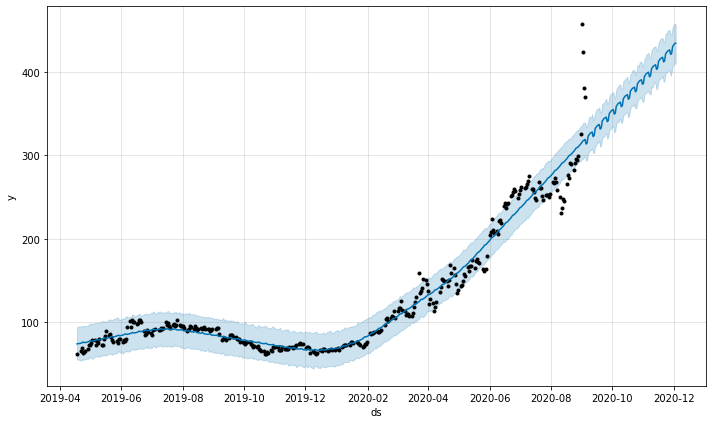

In [27]:
f1 = prophet.plot(forecast)

In [30]:
f2 = plot_plotly(prophet, forecast)
f2.show()

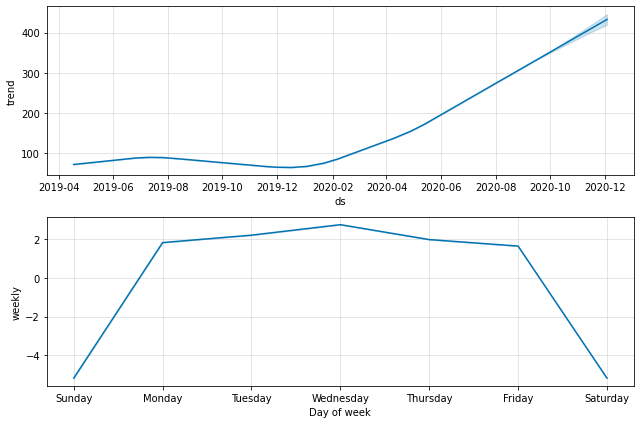

In [34]:
f3 = prophet.plot_components(forecast)

In [32]:
f4 = plot_components_plotly(prophet, forecast)
f4.show()